In [1]:
import numpy as np

In [2]:
data = np.load('data.npy')
target = np.load('target.npy')

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [4]:
model = Sequential()

In [5]:
model.add(Conv2D(200,(3,3),input_shape = data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0, save_best_only=True, mode='auto')
history = model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 55s 55ms/step - loss: 0.7126 - accuracy: 0.5667 - val_loss: 0.6032 - val_accuracy: 0.6734
Epoch 2/20
990/990 [==============================] - 50s 51ms/step - loss: 0.5164 - accuracy: 0.7545 - val_loss: 0.4333 - val_accuracy: 0.8266
Epoch 3/20
990/990 [==============================] - 51s 52ms/step - loss: 0.3500 - accuracy: 0.8535 - val_loss: 0.3248 - val_accuracy: 0.8710
Epoch 4/20
990/990 [==============================] - 51s 51ms/step - loss: 0.2191 - accuracy: 0.9141 - val_loss: 0.2966 - val_accuracy: 0.8790
Epoch 5/20
990/990 [==============================] - 51s 52ms/step - loss: 0.1701 - accuracy: 0.9364 - val_loss: 0.2183 - val_accuracy: 0.9194
Epoch 6/20
990/990 [==============================] - 50s 51ms/step - loss: 0.1332 - accuracy: 0.9626 - val_loss: 0.2154 - val_accuracy: 0.8952
Epoch 7/20
990/990 [==============================] - 51s 51ms/step - loss: 0.1304 - accur

In [9]:
import matplotlib.pyplot as plt

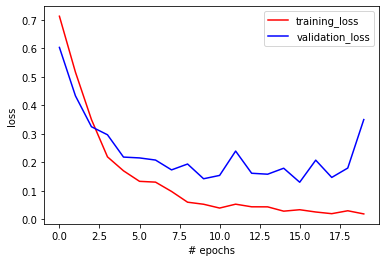

In [10]:
plt.plot(history.history['loss'],'r',label='training_loss')
plt.plot(history.history['val_loss'],'b',label='validation_loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

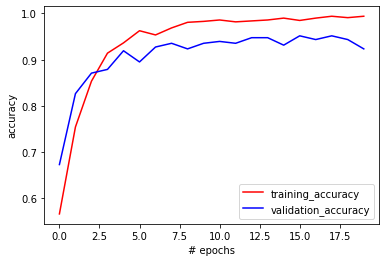

In [11]:
plt.plot(history.history['accuracy'],'r',label='training_accuracy')
plt.plot(history.history['val_accuracy'],'b',label='validation_accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [12]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 3s 20ms/step
[0.26609309427980066, 0.9347826242446899]
